<a href="https://colab.research.google.com/github/mystic23/SCAPI/blob/main/Resolucion_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Primer Punto**
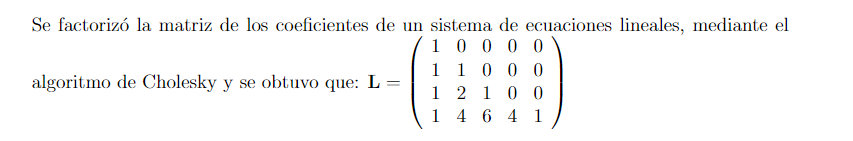

Tenemos que: **Cholesky** $ A = L * L^T$


In [15]:
import numpy as np
import sympy as sp

In [14]:
L = np.array([[1, 0, 0, 0, 0],
              [1, 1, 0, 0, 0],
              [1, 2, 1, 0, 0],
              [1, 4, 6, 4, 1]])

b = np.random.randint(-5, 10, size=(4, 1)) #Aquí genero los valores aleatorios
A_0 = np.dot(L, L.T)  #Aquí obtengo lo que es A aplicando la formula donde A = L * L^T
x = np.linalg.solve(A_0, b)

print("Matriz A: \n", A_0)
print("Matriz b: \n", b)
print("Matriz x: \n", x)


Matriz A: 
 [[ 1  1  1  1]
 [ 1  2  3  5]
 [ 1  3  6 15]
 [ 1  5 15 70]]
Matriz b: 
 [[-4]
 [ 6]
 [ 8]
 [ 1]]
Matriz x: 
 [[-24.29411765]
 [ 32.11764706]
 [-12.58823529]
 [  0.76470588]]


Resultado aleatorio utilizado (por si acaso)
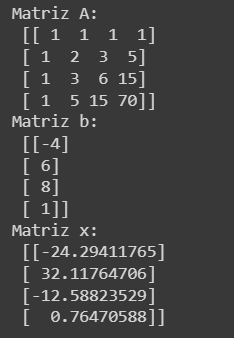

#Punto 1.1

In [27]:
#Entonces agrego manualmente lo que obtuve de los datos aleatorios
A = np.array([[ 1, 1,  1,  1],[ 1,  2,  3,  5],[ 1 , 3,  6, 15],[ 1 , 5, 15 ,70]])
b = np.array([-4,6,8,1])

x1,x2,x3,x4 = sp.symbols('x1,x2,x3,x4')

x=sp.Matrix([x1,x2,x3,x4])
b=sp.Matrix([-4,6,8,1])
A = sp.Matrix([[ 1, 1,  1,  1],[ 1,  2,  3,  5],[ 1 , 3,  6, 15],[ 1 , 5, 15 ,70]])
print(A@x,'\n\n')

Matrix([[x1 + x2 + x3 + x4], [x1 + 2*x2 + 3*x3 + 5*x4], [x1 + 3*x2 + 6*x3 + 15*x4], [x1 + 5*x2 + 15*x3 + 70*x4]]) 




#Punto 1.2 Método Clásico

In [31]:
A = np.array([[ 1, 1,  1,  1],[ 1,  2,  3,  5],[ 1 , 3,  6, 15],[ 1 , 5, 15 ,70]])
b = np.array([-4,6,8,1])

x = np.linalg.inv(A)@b
print('Los valores de x son: ', x)

Los valores de x son:  [-24.29411765  32.11764706 -12.58823529   0.76470588]


#Punto 1.3 Método de Gauss Jordan

In [54]:

A = np.matrix([[ 1, 1,  1,  1, -4],
               [ 1,  2,  3,  5 , 6],
               [ 1 , 3,  6, 15, 8],
               [ 1 , 5, 15 ,70 ,1]])
print(A)

Aumentada = sp.Matrix(A).rref()
print('Matriz Aumentada \n', Aumentada)

[[ 1  1  1  1 -4]
 [ 1  2  3  5  6]
 [ 1  3  6 15  8]
 [ 1  5 15 70  1]]
Matriz Aumentada 
 (Matrix([
[1, 0, 0, 0, -413/17],
[0, 1, 0, 0,  546/17],
[0, 0, 1, 0, -214/17],
[0, 0, 0, 1,   13/17]]), (0, 1, 2, 3))


#Punto 1.4 Factorización de Matrices

In [62]:
#Sistema triangular
#U es sustitucion regresiva
import numpy as np, sympy as sp,matplotlib.pyplot as plt, scipy as sc

A = np.array([[ 1, 1,  1,  1],[ 1,  2,  3,  5],[ 1 , 3,  6, 15],[ 1 , 5, 15 ,70]])
b = np.array([-4,6,8,1])
# print(np.eye(4,4), '\n') #explicacion de los intercambios
P, L, U = sc.linalg.lu(A)  #DOLITTLE-CROUNT
print('Matriz de permutación P: \n', P, '\n\n Matriz triangular inferior L (Dolittle): \n',L,  '\n\n Matriz triangular superior U: \n', U , '\n')


y= np.linalg.inv(L)@P@b.T

x_fm= np.linalg.inv(U)@y.T  #factorizacion de matrices
x_mc=np.linalg.inv(A)@b.T   #metodo clasico

print("\nSistema triangular L · y = b:")
print("y (sustitucion progresiva)=", y, '\n')


print("\nSistema triangular U · x = y:")
print("x (sustitución regresiva) :", x_fm , '\n')

print('Metodo Clasico: \n',x_mc)


Matriz de permutación P: 
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]] 

 Matriz triangular inferior L (Dolittle): 
 [[1.   0.   0.   0.  ]
 [1.   1.   0.   0.  ]
 [1.   0.5  1.   0.  ]
 [1.   0.25 0.75 1.  ]] 

 Matriz triangular superior U: 
 [[  1.      1.      1.      1.   ]
 [  0.      4.     14.     69.   ]
 [  0.      0.     -2.    -20.5  ]
 [  0.      0.      0.      2.125]] 


Sistema triangular L · y = b:
y (sustitucion progresiva)= [-4.     5.     9.5    1.625] 


Sistema triangular U · x = y:
x (sustitución regresiva) : [-24.29411765  32.11764706 -12.58823529   0.76470588] 

Metodo Clasico: 
 [-24.29411765  32.11764706 -12.58823529   0.76470588]


#Punto 1.5 Gauss Seidel

In [65]:

A = np.array([[ 1, 1,  1,  1],[ 1,  2,  3,  5],[ 1 , 3,  6, 15],[ 1 , 5, 15 ,70]])
DP = np.diag(abs(A),0)
NDP = np.sum(abs(A),axis=1).T-DP

print('A = \n', A ,'\n\n','DP = \n', DP,'\n\n','NDP = \n', NDP ,'\n')


def cgjygs(A):
  DP = np.diag(np.abs(A),0)
  NDP = np.sum(np.abs(A),axis=1).T-DP
  if np.all(DP > NDP, axis=0):
    print("La matriz es estrictamente dominante en sentido diagonal")
    return True
  else:
     print("La matriz  No es estrictamente dominante en sentido diagonal")
     return False

print(cgjygs(A))

A = 
 [[ 1  1  1  1]
 [ 1  2  3  5]
 [ 1  3  6 15]
 [ 1  5 15 70]] 

 DP = 
 [ 1  2  6 70] 

 NDP = 
 [ 3  9 19 21] 

La matriz  No es estrictamente dominante en sentido diagonal
False


#Segundo Punto Interpolacion funcional

#Punto 2.1 El polinomio de interpolación

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [98]:
#Valores obtenidos de I en un lapso t
t = np.array([1.0, 1.1, 1.2, 1.3, 1.4])
I = np.array([8.2277, 7.2428, 5.9908, 4.5260, 2.9122])

       4         3         2
3.958 x - 9.158 x - 11.91 x + 27.1 x - 1.767


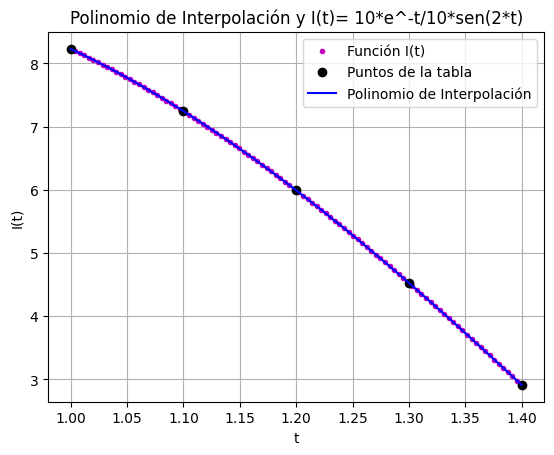

In [99]:
#sabemos que t es x y I(t) es y
def f(t):
    return 10 * np.exp(-t / 10) * np.sin(2 * t)

x = np.linspace(1, 1.4, 100)
y = np.array([f(t) for t in x])

PL = lagrange(t, I) # Lagrange
print(PL)

t_interpolation = np.linspace(1, 1.4, 100)
I_interpolation = PL(t_interpolation)

plt.plot(x, y, 'm.', label='Función I(t)')
plt.plot(t, I, 'ko', label='Puntos de la tabla')
plt.plot(t_interpolation, I_interpolation, 'b-', label='Polinomio de Interpolación')

#aqui nombro los ejes
plt.xlabel('t')
plt.ylabel('I(t)')

plt.legend()
plt.title('Polinomio de Interpolación y I(t)= 10*e^-t/10*sen(2*t)')
plt.grid(True)
plt.show()


#Punto 2.2 El polinomio de lagrange

lo que esta en la funcion coeficents lo saque con ayuda de chatgpt y utilizando la productoria dada en el overleaf
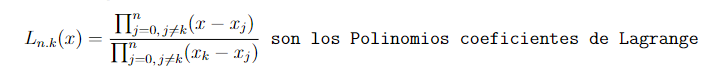

In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:

def f(t):
    return 10 * np.exp(-t / 10) * np.sin(2 * t)

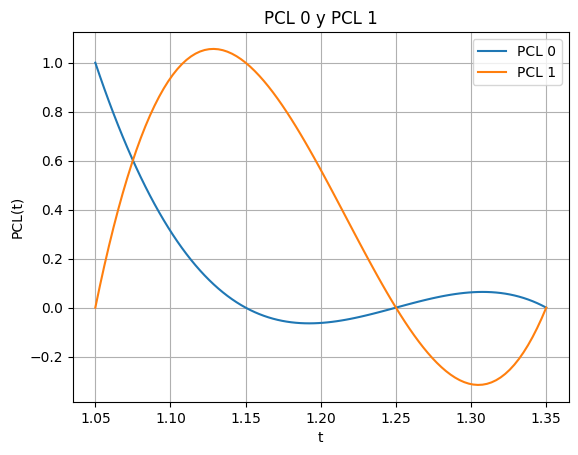

In [122]:


t = np.array([1.05, 1.15, 1.25, 1.35])
I_t = f(t)

# Polinomios Cocientes de Lagrange
def coeficents(t, k):
    n = len(t) - 1
    coef = 1
    for j in range(n + 1):
        if j != k:
            coef *= np.poly1d([1, -t[j]]) / (t[k] - t[j])
    return coef

x = np.linspace(min(t), max(t), 100)
pcl_0 = np.polyval(coeficents(t, 0), x)
pcl_1 = np.polyval(coeficents(t, 1), x)

plt.figure()
plt.plot(x, pcl_0, label='PCL 0')
plt.plot(x, pcl_1, label='PCL 1')

plt.xlabel('t')
plt.ylabel('PCL(t)')
plt.title('PCL 0 y PCL 1')
plt.legend()
plt.grid(True)
plt.show()




#2.3 Error en la interpolación

Para este punti utilice esto

    def f(x):
      return x+2/x
    #Dados $ n+1 $ puntos x,y
    #x = input('... ')
    #y = input('... ')

    x=np.array([1, 2, 2.5])  #[1, 2, 2.5]
    y=np.array([f(t) for t in x])

    ejex=np.linspace(min(x),max(x))
    coef_P=np.linalg.inv(np.vander(x))@y #Coeficientes del Polinomio de Interpolación
    print(coef_P)
    P=np.polyval(coef_P,ejex) # Pn(ejex)
    plt.plot(x,y,'o',ejex,P)
    Ea=abs(f(1.5)-np.polyval(coef_P,1.5))
    print("Error aproximado: ", Ea)

Sin embargo, tambien hice uso de chatgpt para el algoritmo que esta dentro del for

In [123]:
import numpy as np

def f(t):
    return 10 * np.exp(-t / 10) * np.sin(2 * t)

t = np.array([1.05, 1.15, 1.25, 1.35])
I = f(t)


x = np.array([1, 1.1, 1.2, 1.3, 1.4])
y = f(x)


table = "   t   |   I(t)  |  P_n(t)  |  E_a(t)  |  E_r(t)  \n"
table += "-------+---------+----------+----------+----------\n"
for i in range(len(t)):
    coef_P = np.polyfit(x, y, i+1)
    P_t = np.polyval(coef_P, t)
    Ea = np.abs(I - P_t)
    Er = Ea / np.abs(I)
    table += f" {t[i]:.2f}  | {I[i]:.4f} | {P_t[i]:.4f}  | {Ea[i]:.4f}  | {Er[i]:.4f}  \n"

print(table)



   t   |   I(t)  |  P_n(t)  |  E_a(t)  |  E_r(t)  
-------+---------+----------+----------+----------
 1.05  | 7.7717 | 7.7821  | 0.0104  | 0.0013  
 1.15  | 6.6470 | 6.6313  | 0.0157  | 0.0024  
 1.25  | 5.2815 | 5.2812  | 0.0003  | 0.0001  
 1.35  | 3.7341 | 3.7340  | 0.0001  | 0.0000  

